In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HPG Historical Data.csv')

In [ ]:
data.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [ ]:
# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data['Open'] = data['Open'].str.replace(',', '').astype(float)
data['High'] = data['High'].str.replace(',', '').astype(float)
data['Low'] = data['Low'].str.replace(',', '').astype(float)
data['Vol.'] = data['Vol.'].str.replace('M', '').astype(float)
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

In [ ]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-03-31,18909.0,18909.0,19000.0,18500.0,26.15,0.00
1,2023-03-30,18909.0,19091.0,19227.0,18864.0,23.05,0.00
2,2023-03-29,18909.0,18818.0,19182.0,18818.0,19.74,0.48
3,2023-03-28,18818.0,19000.0,19091.0,18818.0,13.56,-0.48
4,2023-03-27,18909.0,18545.0,19000.0,18500.0,22.29,1.96


In [ ]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1303,2018-01-08,12443.5,11991.0,12443.5,11940.7,14.19,3.13
1304,2018-01-05,12066.4,12091.6,12179.6,11978.4,14.03,-0.42
1305,2018-01-04,12116.7,12016.2,12167.0,11965.9,17.79,1.26
1306,2018-01-03,11965.9,12066.4,12192.1,11890.5,18.51,-0.21
1307,2018-01-02,11991.0,11789.9,12003.6,11676.8,15.73,1.81


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1308 non-null   datetime64[ns]
 1   Price     1308 non-null   float64       
 2   Open      1308 non-null   float64       
 3   High      1308 non-null   float64       
 4   Low       1308 non-null   float64       
 5   Vol.      1308 non-null   float64       
 6   Change %  1308 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 71.7 KB


In [ ]:
#check for duplication and missing values
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
# Statistical Analysis
print(data.describe())

                                Date         Price          Open  \
count                           1308   1308.000000   1308.000000   
mean   2020-08-18 12:58:20.917431296  19249.098318  19261.464985   
min              2018-01-02 00:00:00   7411.800000   7000.000000   
25%              2019-05-05 06:00:00  11605.100000  11613.900000   
50%              2020-08-18 12:00:00  14957.300000  14944.750000   
75%              2021-12-06 06:00:00  24003.825000  24081.000000   
max              2023-03-31 00:00:00  43895.800000  43895.800000   
std                              NaN   9780.769912   9809.760926   

               High           Low         Vol.     Change %        Month  \
count   1308.000000   1308.000000  1308.000000  1308.000000  1308.000000   
mean   19541.894801  18986.827905    24.253647     0.064274     6.456422   
min     7640.600000   6977.200000     3.320000    -7.000000     1.000000   
25%    11736.650000  11445.475000    13.192500    -1.132500     3.000000   
50%    

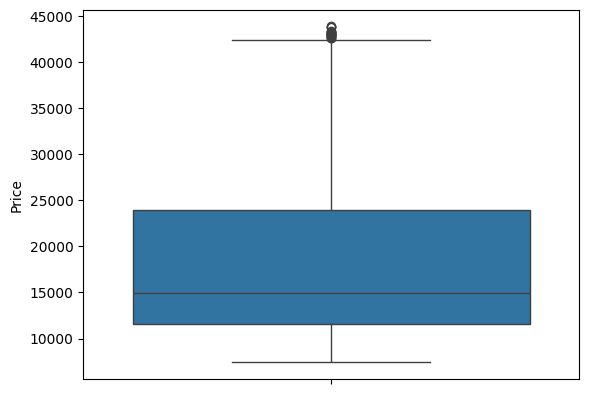

In [ ]:
# Check for Outliers
sns.boxplot(data=data['Price'])
plt.show()

In [ ]:
# Chọn ra giá trị Date và Price của những outliers
outliers = data[data['Price'] > data['Price'].quantile(0.95)]
outliers_sorted = outliers.sort_values(by='Price', ascending=False)[['Date', 'Price']]
print(outliers_sorted)


          Date    Price
354 2021-10-28  43895.8
362 2021-10-18  43820.1
355 2021-10-27  43820.1
363 2021-10-15  43366.0
367 2021-10-11  43290.3
..         ...      ...
447 2021-06-17  38900.8
340 2021-11-17  38900.8
390 2021-09-08  38825.1
384 2021-09-16  38825.1
382 2021-09-20  38825.1

[64 rows x 2 columns]


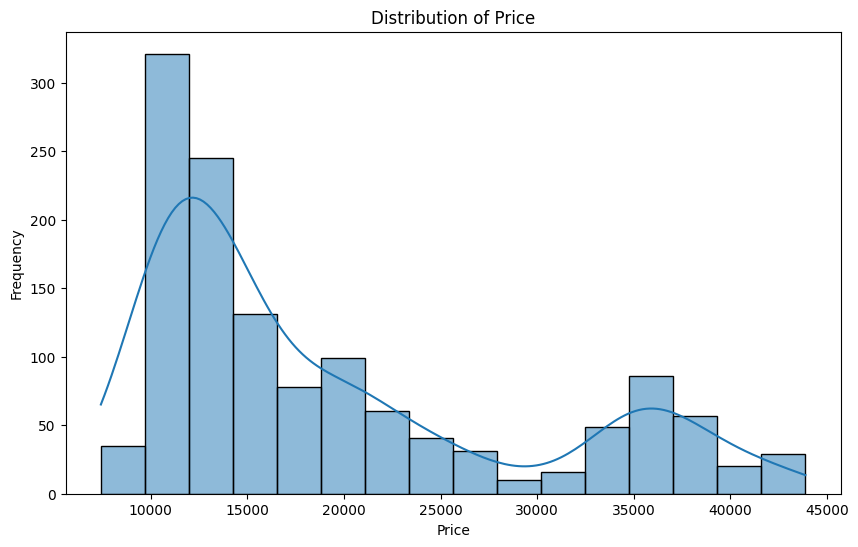

In [ ]:
# 1. Exploration and Visualizations
# Distribution of Price:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=16, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


The distribution of Price is positively skewed, indicating that there are more days with lower prices than days with higher prices. The median price is around 12500.


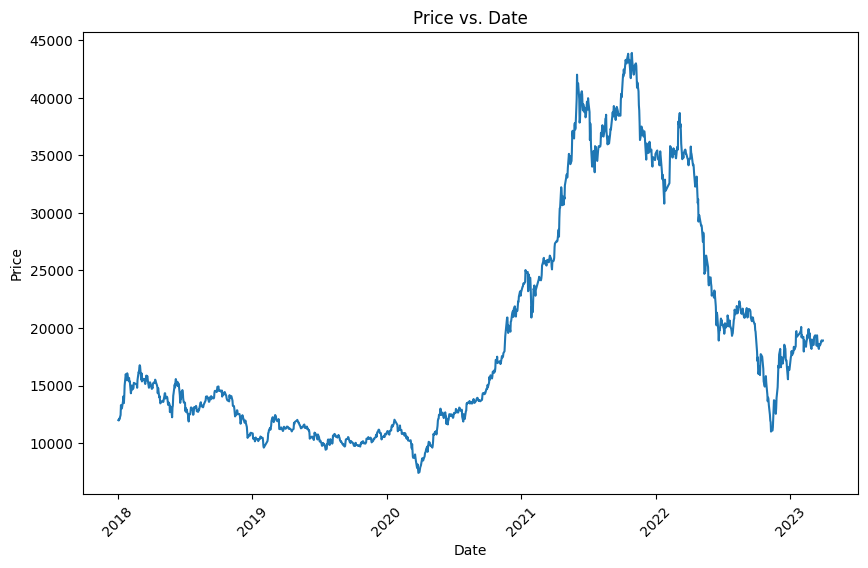

In [ ]:
#Price vs. Date:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Price')
plt.title('Price vs. Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Giá cổ phiếu HPG tăng mạnh từ khoảng cuối năm 2020 và đạt đỉnh vào cuối năm 2021.

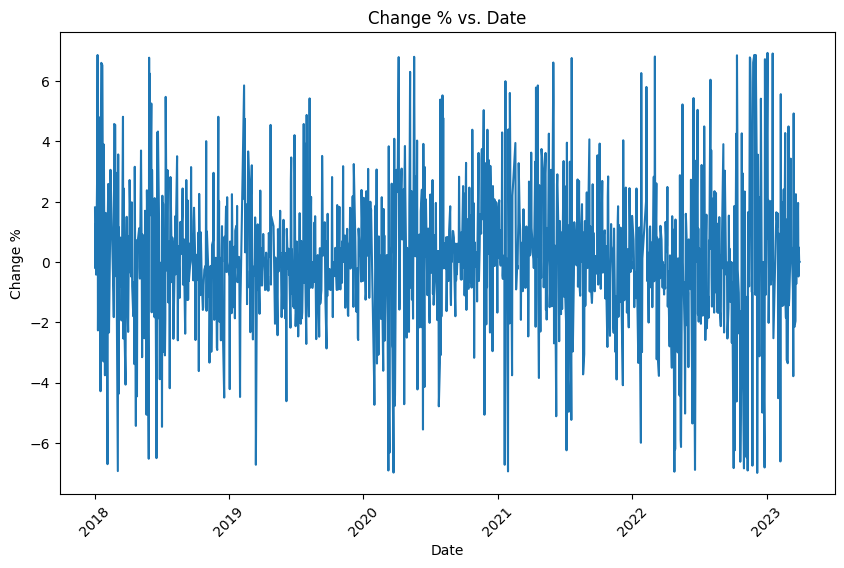

In [ ]:
#Change Percent vs. Date:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Change %')
plt.title('Change % vs. Date')
plt.xlabel('Date')
plt.ylabel('Change %')
plt.xticks(rotation=45)
plt.show()

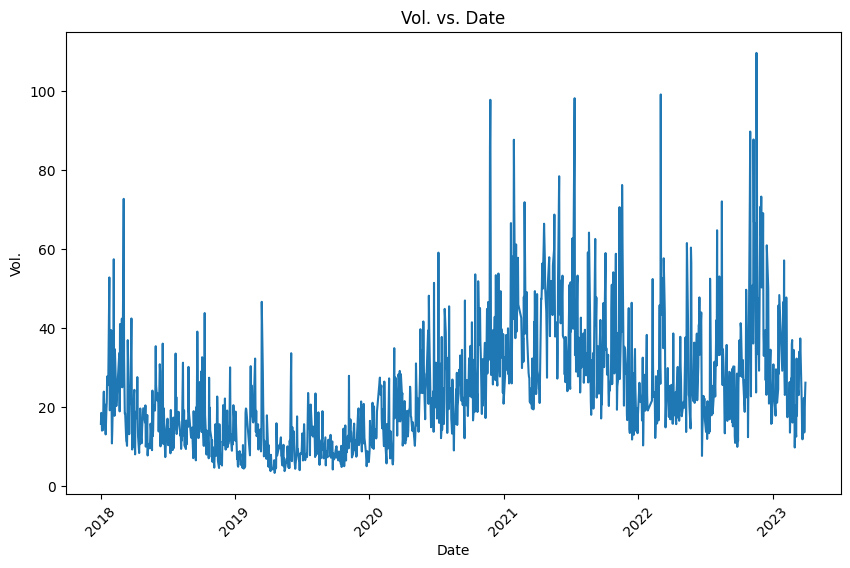

In [ ]:
#Change Volumn vs. Date:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Vol.')
plt.title('Vol. vs. Date')
plt.xlabel('Date')
plt.ylabel('Vol.')
plt.xticks(rotation=45)
plt.show()

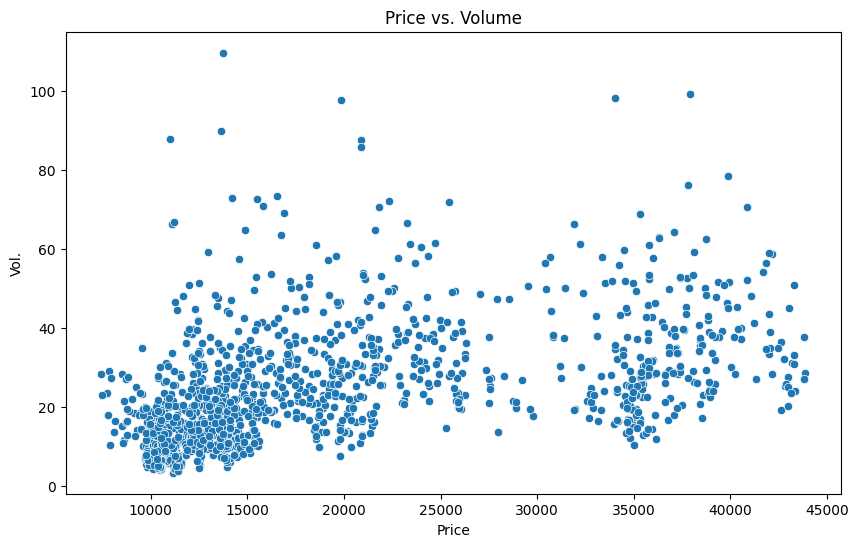

In [ ]:
# Scatter plot of Price vs. Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Vol.', data=data)
plt.title('Price vs. Volume')
plt.show()

In [ ]:
# a. Correlation between Price and Volume:
correlation = data['Price'].corr(data['Vol.'])
print('Correlation between Price and Volume:', correlation)

Correlation between Price and Volume: 0.4752060748748513


Hệ số tương quan 0.4752060748748513 giữa giá và khối lượng cho thấy có một mức độ tương quan dương nhất định giữa hai biến. Tuy nhiên, mức độ tương quan này không mạnh và chỉ cho thấy một mối quan hệ tương đối yếu giữa giá và khối lượng.

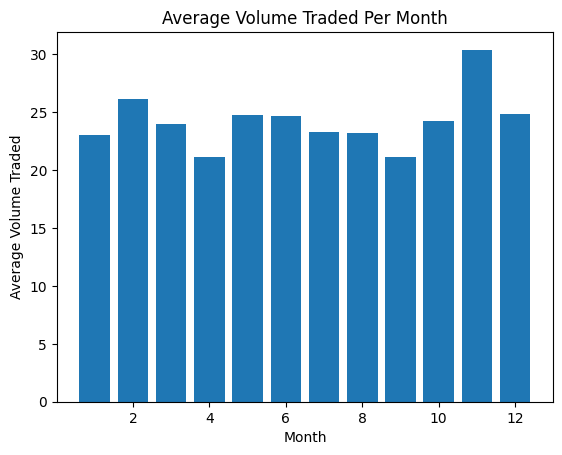

In [ ]:
#Bar chart of the average volume traded per month
data['Month'] = data['Date'].dt.month
avg_volume = data.groupby('Month')['Vol.'].mean()
plt.bar(avg_volume.index, avg_volume.values)
plt.xlabel('Month')
plt.ylabel('Average Volume Traded')
plt.title('Average Volume Traded Per Month')
plt.show()

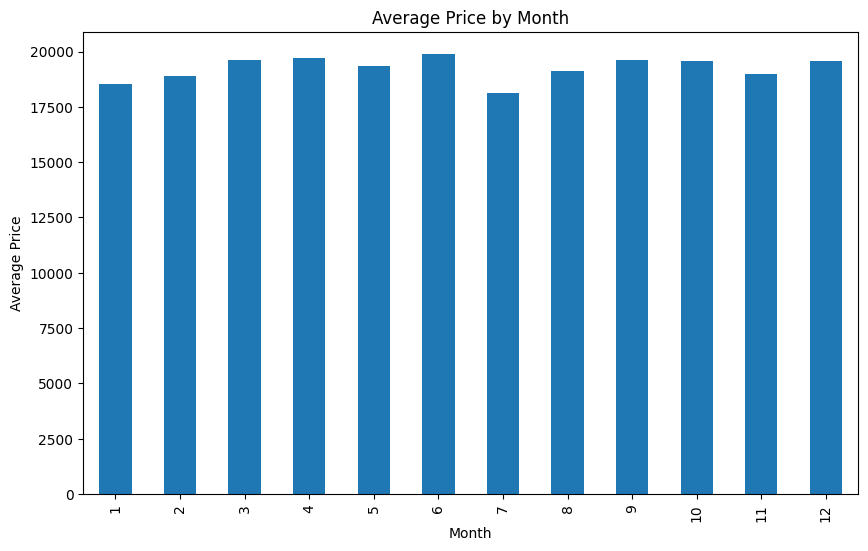

In [ ]:
monthly_average_prices = data.groupby('Month')['Price'].mean()

# Create a bar chart of the average prices by month
plt.figure(figsize=(10, 6))
monthly_average_prices.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')
plt.show()

Biểu đồ cột cho thấy sự tăng trưởng mạnh mẽ trong thanh khoản của cổ phiếu HPG vào tháng 11 so với các tháng khác. Trong khi trung bình giá cổ Phiếu HPG qua các tháng không có nhiều biến động

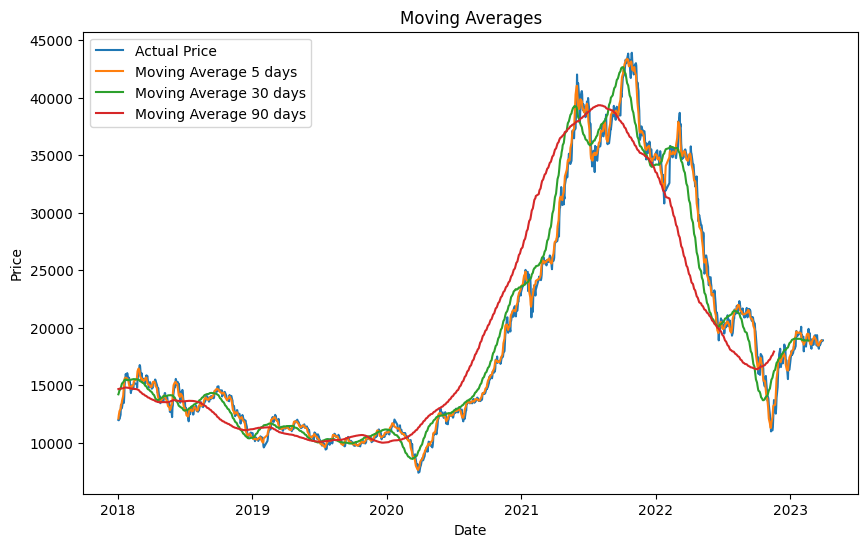

In [ ]:
# 2. Time Series Analysis:
data['Moving Average 5 days'] = data['Price'].rolling(window=5).mean()
data['Moving Average 30 days'] = data['Price'].rolling(window=30).mean()
data['Moving Average 90 days'] = data['Price'].rolling(window=90).mean()
# Plot moving averages:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Actual Price')
plt.plot(data['Date'], data['Moving Average 5 days'], label='Moving Average 5 days')
plt.plot(data['Date'], data['Moving Average 30 days'], label='Moving Average 30 days')
plt.plot(data['Date'], data['Moving Average 90 days'], label='Moving Average 90 days')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The moving averages show an upward trend in the stock price over time. This indicates that the stock price is generally increasing in value.

## Conclusion:
1. Dựa vào dữ liệu giá cổ phiếu HPG từ 2016 đến 2022, giá cổ phiếu HPG có xu hướng tăng trong dài hạn. Tuy nhiên, giá cổ phiếu cũng có những biến động mạnh trong ngắn hạn.
2. Khối lượng giao dịch của cổ phiếu HPG có xu hướng tăng trong những năm gần đây, cho thấy sự quan tâm ngày càng tăng của các nhà đầu tư đối với cổ phiếu này.
3. Giá cổ phiếu HPG có mối tương quan dương với khối lượng giao dịch, cho thấy khi khối lượng giao dịch tăng thì giá cổ phiếu cũng có xu hướng tăng.
4. Giá cổ phiếu HPG có xu hướng tăng mạnh vào cuối năm 2020 và đạt đỉnh vào cuối năm 2021. Sau đó, giá cổ phiếu có xu hướng giảm vào năm 2022.
5. Các đường trung bình động cho thấy xu hướng tăng trong giá cổ phiếu HPG trong dài hạn.